In [1]:
%matplotlib inline 

import pandas 
from numpy import nan 

pandas.options.display.max_rows = 1000

In [2]:
# thermal stability data set 

th = pandas.read_csv( '../data_sets/experimental/thermo_paper_data_set.csv', index_col=0 ) 
print th.sample( 5 ) 

        sequence_pos    tm          why_no_tm   kcat  ekcat    km   ekm  \
mutant                                                                    
E222R          222.0   NaN         no protein   42.0    2.0  2.48  0.44   
Y295G          295.0   NaN  catalytic residue    NaN    NaN   NaN   NaN   
I91E            91.0  39.2                NaN  846.0   35.0  6.71  0.79   
C167Q          167.0  38.5                NaN  504.0    6.0  4.92  0.19   
N220Y          220.0  41.6                NaN  628.0    0.8  0.40  4.10   

            ki    eki    kcatkm  ekcatkm  in_plos_paper  added_later  \
mutant                                                                 
E222R      NaN    NaN   17098.0   3148.0              1            0   
Y295G      NaN    NaN      10.0      1.0              0            0   
I91E       NaN    NaN  126071.0  15714.0              1            0   
C167Q   590.71  86.56  102415.0   4149.0              1            0   
N220Y      NaN    NaN       NaN      NaN  

In [3]:
# non_cov features 

nc = pandas.read_csv( '../data_sets/rosetta/enzyme_design_noncovalent_2.csv' )
nc = nc.groupby( 'description' ).apply( lambda x: x.sort_values(by='total_score').head(10).mean() )  
print nc.sample( 5 ) 

             total_score   fa_rep  hbond_sc  all_cst  tot_pstat_pm  \
description                                                          
I244E           -684.794  286.135   -69.745    0.009         0.688   
N404C           -687.356  287.140   -69.739    0.014         0.693   
G153A           -570.636  400.463   -69.462    0.008         0.701   
R359E           -687.058  286.636   -69.515    0.007         0.693   
H379T           -686.408  286.637   -71.097    0.011         0.700   

             tot_nlpstat_pm  tot_burunsat_pm  tot_hbond_pm  tot_NLconts_pm  \
description                                                                  
I244E                 0.691            153.2         437.7           151.8   
N404C                 0.690            150.7         436.8           151.1   
G153A                 0.698            152.6         438.1           150.9   
R359E                 0.691            151.4         436.9           150.8   
H379T                 0.688            14

In [4]:
J = th.join( nc ) # joined = thermo.join( non_covalent ) 

In [5]:
print J.sample( 10 ) 

        sequence_pos    tm          why_no_tm   kcat  ekcat     km   ekm  \
mutant                                                                     
T352A          352.0  38.0                NaN   60.0    2.0  14.26  1.76   
N404A          404.0  42.0                NaN    4.0    1.0   9.42  0.42   
C167Q          167.0  38.5                NaN  504.0    6.0   4.92  0.19   
M221A          221.0   NaN         no protein  547.0   15.0   6.25  0.60   
E222K          222.0  38.5                NaN  108.0    3.0   7.22  0.75   
E164G          164.0   NaN  catalytic residue    NaN    NaN    NaN   NaN   
R76A            76.0   NaN      no expression    NaN    NaN    NaN   NaN   
T296E          296.0   NaN                NaN    NaN    NaN    NaN   NaN   
N220A          220.0  38.6                NaN  405.0    8.0  10.27  0.68   
H119A          119.0  40.2                NaN  143.0   11.0  15.10  3.36   

            ki    eki    kcatkm        ...         SR_4_nlpstat_pm   SR_5  \
mutant    

In [6]:
J.columns

Index([u'sequence_pos', u'tm', u'why_no_tm', u'kcat', u'ekcat', u'km', u'ekm',
       u'ki', u'eki', u'kcatkm', u'ekcatkm', u'in_plos_paper', u'added_later',
       u'expression', u'gel_number', u'note', u'total_score', u'fa_rep',
       u'hbond_sc', u'all_cst', u'tot_pstat_pm', u'tot_nlpstat_pm',
       u'tot_burunsat_pm', u'tot_hbond_pm', u'tot_NLconts_pm',
       u'tot_nlsurfaceE_pm', u'tot_total_charge', u'tot_total_pos_charges',
       u'tot_total_neg_charges', u'tot_seq_recovery', u'SR_1',
       u'SR_1_total_score', u'SR_1_fa_rep', u'SR_1_hbond_sc', u'SR_1_all_cst',
       u'SR_1_hbond_pm', u'SR_1_burunsat_pm', u'SR_1_pstat_pm',
       u'SR_1_nlpstat_pm', u'SR_2', u'SR_2_total_score', u'SR_2_fa_rep',
       u'SR_2_hbond_sc', u'SR_2_all_cst', u'SR_2_hbond_pm',
       u'SR_2_burunsat_pm', u'SR_2_pstat_pm', u'SR_2_nlpstat_pm', u'SR_3',
       u'SR_3_total_score', u'SR_3_fa_rep', u'SR_3_hbond_sc', u'SR_3_all_cst',
       u'SR_3_hbond_pm', u'SR_3_burunsat_pm', u'SR_3_pstat_pm',
     

In [7]:
rosetta_features = [ 
    u'total_score', u'fa_rep', u'hbond_sc', u'tot_pstat_pm', u'tot_nlpstat_pm', u'tot_burunsat_pm', u'tot_hbond_pm', u'tot_NLconts_pm', u'tot_nlsurfaceE_pm', u'tot_total_charge', u'tot_total_pos_charges', u'tot_total_neg_charges', 
    u'SR_1_total_score', u'SR_1_fa_rep', u'SR_1_hbond_sc', u'SR_1_hbond_pm', u'SR_1_burunsat_pm', u'SR_1_pstat_pm', u'SR_1_nlpstat_pm', 
    u'SR_2_total_score', u'SR_2_fa_rep', u'SR_2_hbond_sc', u'SR_2_hbond_pm', u'SR_2_burunsat_pm', u'SR_2_pstat_pm', u'SR_2_nlpstat_pm', 
    u'SR_3_total_score', u'SR_3_fa_rep', u'SR_3_hbond_sc', u'SR_3_hbond_pm', u'SR_3_burunsat_pm', u'SR_3_pstat_pm', u'SR_3_nlpstat_pm',
    u'SR_4_total_score', u'SR_4_fa_rep', u'SR_4_hbond_sc', u'SR_4_hbond_pm', u'SR_4_burunsat_pm', u'SR_4_pstat_pm', u'SR_4_nlpstat_pm', 
    u'SR_5_total_score', u'SR_5_fa_rep', u'SR_5_hbond_sc', u'SR_5_interf_E_1_2', u'SR_5_dsasa_1_2', u'SR_5_hbond_pm', u'SR_5_burunsat_pm'
]

targets = [ 'expression', 'tm', 'kcat', 'km', 'kcatkm' ] 

In [8]:
!mkdir feature_sets

mkdir: feature_sets: File exists


In [9]:
for target in targets:
    
    T = J[ rosetta_features + [ target ] ].dropna()
    print len( T ), 'for target', target 
    
    T.to_csv( 'feature_sets/{}_enzyme_design.csv'.format( target ) ) 

126 for target expression
60 for target tm
78 for target kcat
78 for target km
78 for target kcatkm


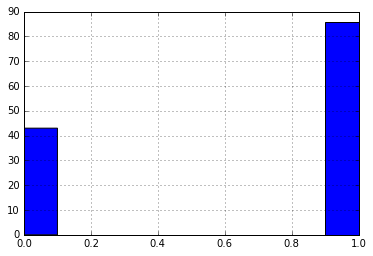

In [10]:
# binary expression class distribution 
J.expression.hist()

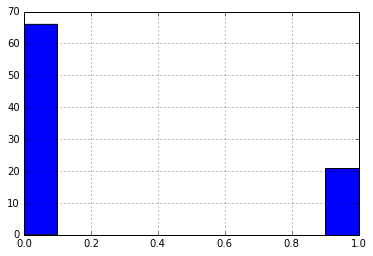

In [41]:
# new things to predict
# assign two classes: 0=deterimental, 1=beneficial 
 
class1 = []
for idx, row in J.iterrows():
    if row.expression == 0 or row.tm < 38.9:
        class1.append( 0 ) 
    elif row.expression == 1 and row.tm >= 39.9:
        class1.append( 1 ) 
    else:
        class1.append( nan )
        
J[ 'class1' ] = class1 
J.class1.hist()

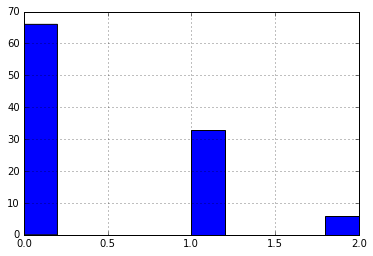

In [46]:
# assign three classes: 
#   0=detrimental (not expressed or dTm < 1)
#   1=neutral (-1 < dTm < 1)
#   2=beneficial dTm > 1 

class1 = []
for idx, row in J.iterrows():
    if row.expression == 0 or row.tm < 38.9:
        class1.append( 0 ) 
    elif 38.9 <= row.tm <= 40.9:
        class1.append( 1 ) 
    elif row.tm > 40.9:
        class1.append( 2 ) 
    else:
        class1.append( nan )
        
J[ 'class1' ] = class1 
J.class1.hist()